In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


In [3]:
labels.head()

,0
0,positive
1,negative
2,positive
3,negative
4,positive


In [4]:
y.head()

,0
0,1
1,0
2,1
3,0
4,1


In [5]:
reviews.info(), labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


(None, None)

In [6]:
# count empty strings in reviews and labels
print((reviews=='').sum())
print((labels=='').sum())

0    0
dtype: int64
0    0
dtype: int64


In [7]:
# replace br with nothing in reviews

# reviews has br since it is sraped through html.

reviews = reviews.replace({'br': ''}, regex=True)

# a) 
Split the data into test, train and validation sets

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)

y = np.array(y)
X = vectorizer.fit_transform(reviews[0]).toarray()
X.shape

(25000, 10000)

In [9]:
# test train and validation split
# test = 20%
# train = 64%
# validation = 16%

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(16000, 10000)
(5000, 10000)
(4000, 10000)


# b)
Explore the representation of the reviews.

In [10]:
df_bow_sklearn = pd.DataFrame(X,columns=vectorizer.get_feature_names_out())
df_bow_sklearn

,aaham,aaron,abandon,abandoned,abbott,abc,abducted,abilities,ability,able,...,zizek,zodiac,zombi,zombie,zombies,zone,zoo,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Most frequent words
df_bow_sklearn.sum().sort_values(ascending=False).head(20)

the      336713
and      164242
of       145864
to       135720
is       107330
it        96394
in        93968
this      76000
that      73245
was       48208
as        46941
for       44343
with      44125
movie     44039
but       42603
film      40155
you       34230
on        34200
not       30626
he        30138
dtype: int64

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
# phow much memory some variables are using
import sys

total_size = (sys.getsizeof(X) + sys.getsizeof(y) + sys.getsizeof(reviews) + sys.getsizeof(labels) + sys.getsizeof(vectorizer) + sys.getsizeof(df_bow_sklearn)) / 1024 / 1024
print("Memory usage: {:.2f} MB".format(total_size))

Memory usage: 3849.66 MB


In [15]:
input_dim = X.shape[1]

In [16]:
# clear some memory
del X, y, reviews, labels, df_bow_sklearn

# c)
Train NN with a single hidden layer on the dataset. Tune relevant hyperparameters.

Without the dropout layer it was very difficult to avoid overfitting

In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

nn_model = tf.keras.Sequential([
    layers.Dense(units=64, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])

nn_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 

2023-10-30 06:01:20.851964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 06:01:20.851999: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 06:01:20.852024: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 06:01:20.859632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 06:01:21.954437: W tensorflow/compiler/

In [18]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640129 (2.44 MB)
Trainable params: 640129 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
es = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = nn_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/500


2023-10-30 06:01:23.277676: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1280000000 exceeds 10% of free system memory.


500/500 [==============================] - 6s 10ms/step - loss: 0.6380 - accuracy: 0.8135 - val_loss: 0.5871 - val_accuracy: 0.8400
Epoch 2/500
500/500 [==============================] - 5s 10ms/step - loss: 0.5955 - accuracy: 0.8410 - val_loss: 0.5586 - val_accuracy: 0.8668
Epoch 3/500
500/500 [==============================] - 5s 9ms/step - loss: 0.5930 - accuracy: 0.8469 - val_loss: 0.5778 - val_accuracy: 0.8687
Epoch 4/500
500/500 [==============================] - 5s 10ms/step - loss: 0.5910 - accuracy: 0.8468 - val_loss: 0.5816 - val_accuracy: 0.8687
Epoch 5/500
500/500 [==============================] - 5s 10ms/step - loss: 0.5930 - accuracy: 0.8524 - val_loss: 0.5725 - val_accuracy: 0.8692
Epoch 6/500
500/500 [==============================] - 5s 9ms/step - loss: 0.5926 - accuracy: 0.8473 - val_loss: 0.5800 - val_accuracy: 0.8620
Epoch 7/500
500/500 [==============================] - 5s 10ms/step - loss: 0.5876 - accuracy: 0.8547 - val_loss: 0.5783 - val_accuracy: 0.8643
Epoch 

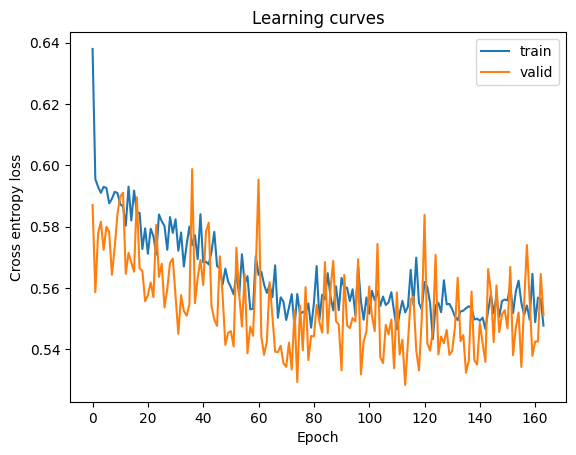

In [25]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

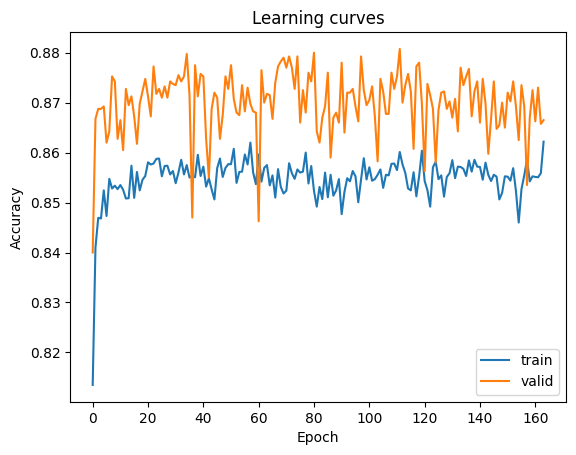

In [26]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [22]:
# print the best epoc values for loss and accuracy

print("Best epoch for loss: ", np.argmin(history.history['val_loss']))
print("Best epoch for accuracy: ", np.argmax(history.history['val_accuracy']))

# what epoc was chosen to save the best weights

print("Best epoch for loss: ", es.stopped_epoch)

Best epoch for loss:  113
Best epoch for accuracy:  111
Best epoch for loss:  163


# d)
Test sentiment-classifier on test set

In [28]:
# Train model on tain and validation data

sentiment_model = tf.keras.Sequential([
    layers.Dense(units=64, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation='sigmoid')
])

sentiment_model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy']) 

In [29]:
es = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = sentiment_model.fit(X_trainval, y_trainval, epochs=500, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/500


2023-10-30 06:18:23.694835: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1600000000 exceeds 10% of free system memory.


625/625 [==============================] - 7s 10ms/step - loss: 0.6281 - accuracy: 0.8146 - val_loss: 0.5610 - val_accuracy: 0.8626
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 0.5923 - accuracy: 0.8395 - val_loss: 0.5560 - val_accuracy: 0.8664
Epoch 3/500
625/625 [==============================] - 6s 10ms/step - loss: 0.5894 - accuracy: 0.8421 - val_loss: 0.5677 - val_accuracy: 0.8654
Epoch 4/500
625/625 [==============================] - 6s 10ms/step - loss: 0.5939 - accuracy: 0.8447 - val_loss: 0.5403 - val_accuracy: 0.8698
Epoch 5/500
625/625 [==============================] - 6s 10ms/step - loss: 0.5875 - accuracy: 0.8468 - val_loss: 0.5667 - val_accuracy: 0.8660
Epoch 6/500
625/625 [==============================] - 6s 10ms/step - loss: 0.5934 - accuracy: 0.8482 - val_loss: 0.5418 - val_accuracy: 0.8664
Epoch 7/500
625/625 [==============================] - 6s 10ms/step - loss: 0.5893 - accuracy: 0.8489 - val_loss: 0.5567 - val_accuracy: 0.8666
Epoch

In [30]:
# test classifier on the test set

test_loss, test_acc = sentiment_model.evaluate(X_test, y_test, verbose=2)

157/157 - 0s - loss: 0.5208 - accuracy: 0.8758 - 382ms/epoch - 2ms/step


# e)
Use classifier to classify self written sentences

In [31]:
sentences =[
    'The camera moved too fast and it was hard to see what was going on',
    'The movie was great and I really liked it',
    'The movie was bad and I did not like it',
    'The movie was ok and I did not like it',
    'The movie was ok but I liked it',
    'The movie was ok and I liked it',
    'The movie was bad but I liked it',
    'The movie was bad and I liked it',
]

# vectorize the sentences
vetorized_sentences = vectorizer.transform(sentences).toarray()

# predict the sentiment of the sentences
predictions = sentiment_model.predict(vetorized_sentences)


for sentence, prediction in zip(sentences, predictions):
    print(sentence, "-", 'Positive: ' if np.round(prediction) > 0.0 else 'Negative: ' , np.round(prediction[0], 2))


1/1 [==============================] - 0s 110ms/step
The camera moved too fast and it was hard to see what was going on - Negative:  0.36
The movie was great and I really liked it - Positive:  0.86
The movie was bad and I did not like it - Negative:  0.19
The movie was ok and I did not like it - Negative:  0.36
The movie was ok but I liked it - Negative:  0.5
The movie was ok and I liked it - Positive:  0.56
The movie was bad but I liked it - Negative:  0.27
The movie was bad and I liked it - Negative:  0.32
